
# Cardiovascular Disease Dataset

1. Dataset Description:
This dataset includes medical records of patients, such as age, gender, cholesterol levels, and blood pressure, along with the target variable showing the presence or absence of cardiovascular disease. The data was collected from "Kaggle" to understand the risk factors and improve predictive models for cardiovascular disease.

2. Goal:
This dataset aims to help detect cardiovascular disease early through predictive modeling, identifying key risk factors, and developing models to predict cardiovascular problems for personalized and timely interventions by healthcare professionals. By focusing on this dataset, we're dealing with classification and clustering.

5. Link to dataset:
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

6. General information:

   
   -Number of attributes: 14

   -Attributes type: Integer - Decimal.

   -Number of objects: 70000

   -The class label: presence or absence of cardiovascular disease. 


In [198]:
import piplite
await piplite.install('seaborn')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn. preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [199]:
cardiovascular=pd.read_csv('healthData.csv')
df=pd.DataFrame(cardiovascular)

In [200]:
print('The number of rows:')
rows=df.shape[0]
print(rows)

The number of rows:
70000


In [201]:
print('The number of columns:')
columns=df.shape[1]
print(columns)

The number of columns:
14


In [202]:
print('Information about dataset:')
print(df.info)

Information about dataset:
<bound method DataFrame.info of        Unnamed: 0       id      age  gender  height  weight  ap_hi  ap_lo  \
0               0      0.0  18393.0       1   168.0    62.0  110.0   80.0   
1               1      1.0  20228.0       0   156.0    85.0  140.0   90.0   
2               2      2.0  18857.0       0   165.0    64.0  130.0   70.0   
3               3      3.0  17623.0       1   169.0    82.0  150.0  100.0   
4               4      4.0  17474.0       0   156.0    56.0  100.0   60.0   
...           ...      ...      ...     ...     ...     ...    ...    ...   
69995       69995  99993.0  19240.0       1   168.0    76.0  120.0   80.0   
69996       69996  99995.0  22601.0       0   158.0   126.0  140.0   90.0   
69997       69997  99996.0  19066.0       1   183.0   105.0  180.0   90.0   
69998       69998  99998.0  22431.0       0   163.0    72.0  135.0   80.0   
69999       69999  99999.0  20540.0       0   170.0    72.0  120.0   80.0   

       cholester

In [203]:
#samples of raw dataset
first_3_rows = df.head (3)
print("First 3 rows:")
print(first_3_rows)

last_2_rows = df.tail(2)
print("\nLast 2 rows:")
print (last_2_rows)

First 3 rows:
   Unnamed: 0   id      age  gender  height  weight  ap_hi  ap_lo  \
0           0  0.0  18393.0       1   168.0    62.0  110.0   80.0   
1           1  1.0  20228.0       0   156.0    85.0  140.0   90.0   
2           2  2.0  18857.0       0   165.0    64.0  130.0   70.0   

   cholesterol  gluc  smoke  alco  active  cardio  
0            0     0      0     0       1       0  
1            2     0      0     0       1       1  
2            2     0      0     0       0       1  

Last 2 rows:
       Unnamed: 0       id      age  gender  height  weight  ap_hi  ap_lo  \
69998       69998  99998.0  22431.0       0   163.0    72.0  135.0   80.0   
69999       69999  99999.0  20540.0       0   170.0    72.0  120.0   80.0   

       cholesterol  gluc  smoke  alco  active  cardio  
69998            0     1      0     0       0       1  
69999            1     0      0     0       1       0  


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>],
       [<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>,
        <AxesSubplot:title={'center':'alco'}>],
       [<AxesSubplot:title={'center':'active'}>,
        <AxesSubplot:title={'center':'cardio'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

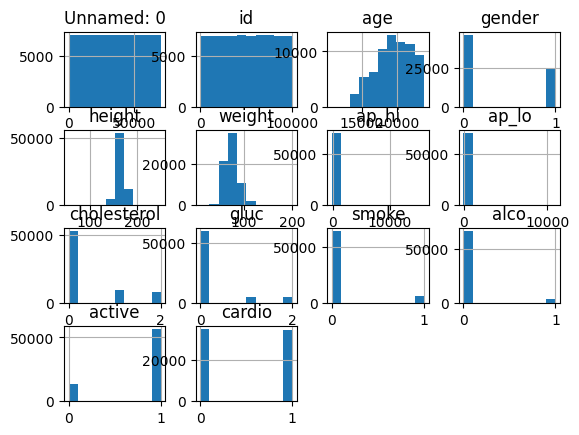

In [204]:
#Histogram
df.hist()

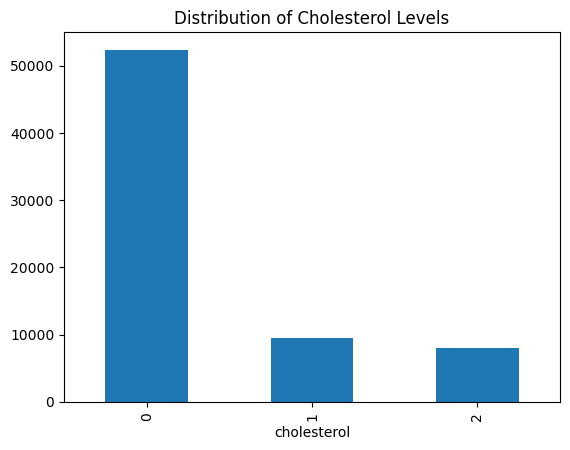

In [205]:
#BarChart
cholesterol_count = cardiovascular['cholesterol'].value_counts()
cholesterol_count.plot(kind='bar', x='Cholesterol Level', y='Count')
plt.title('Distribution of Cholesterol Levels')
plt.show()

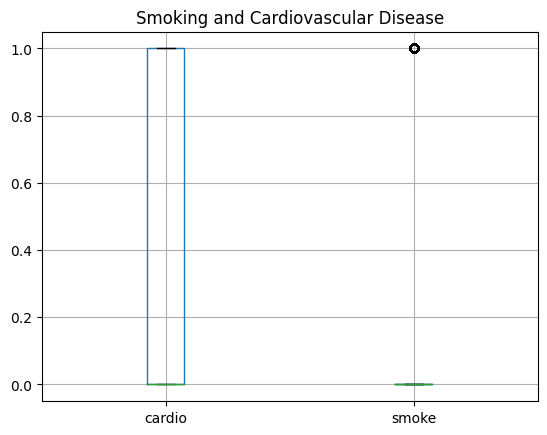

In [206]:
#BoxPlot
df[['cardio', 'smoke']].boxplot()
plt.title('Smoking and Cardiovascular Disease')
plt.show()

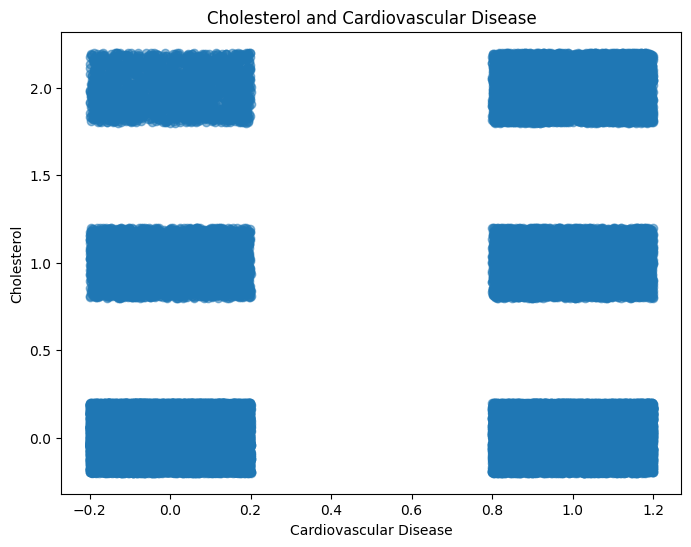

In [207]:
#Scatter plot with jitter
x = df['cardio']
y = df['cholesterol']
jitter_strength = 0.2  
x_jittered = x + np.random.uniform(-jitter_strength, jitter_strength, size=x.shape)
y_jittered = y + np.random.uniform(-jitter_strength, jitter_strength, size=y.shape)
plt.figure(figsize=(8, 6))
plt.scatter(x_jittered, y_jittered, alpha=0.5)
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Cholesterol')
plt.title('Cholesterol and Cardiovascular Disease')
plt.show()

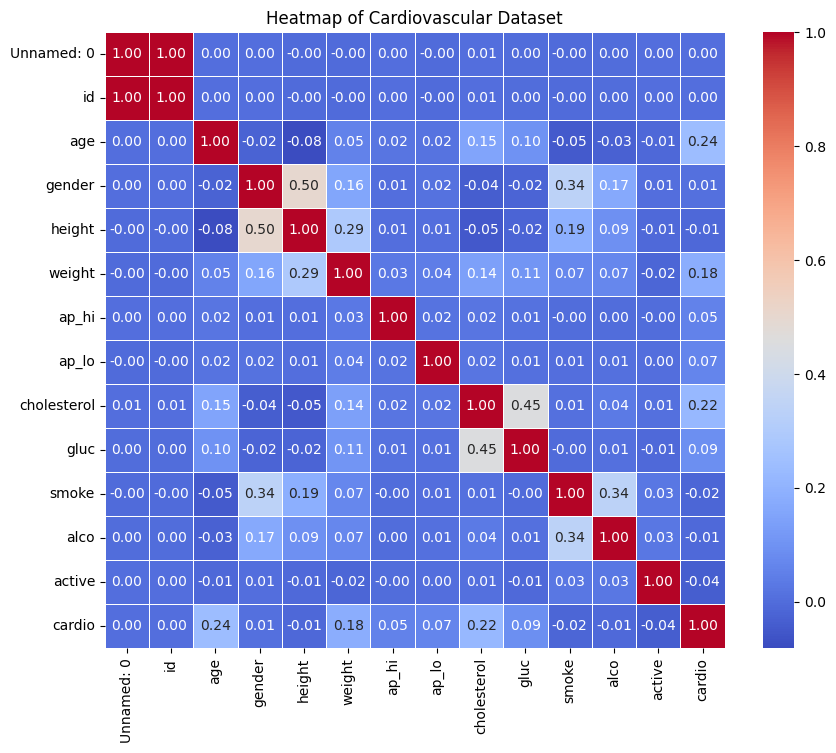

In [208]:
# Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))  # Adjust the size as necessary
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Cardiovascular Dataset')
plt.show()

In [209]:
#Detect and remove outliers (remove noise)

outlier_threshold = 1.5

def detect_outliers(column_data):
    # Calculate the first and third quartile
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    
    iqr = q3 - q1
    
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    
    return outliers

numeric_columns = data.select_dtypes(include=[np.number]).columns

cleaned_data = data.copy()

for column in numeric_columns:
    outliers = detect_outliers(cleaned_data[column])
    
    cleaned_data = cleaned_data[~outliers]

print(f"Original data had {len(data)} rows")
print(f"Cleaned data has {len(cleaned_data)} rows after removing outliers")



Original data had 70000 rows
Cleaned data has 31449 rows after removing outliers


In [210]:
#Checking for missing values
missing_values = df.isna().sum()
print( "Missing values in each column:")
print(missing_values)
print("\nTotal number of missing values in the dataset:", missing_values. sum())

Missing values in each column:
Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Total number of missing values in the dataset: 0


In [211]:
#Statistical summaries 
summary = df.describe()
variance = df.var()
print("Statistical Summary:\n", summary)
print("\nVariance:\n", variance)

Statistical Summary:
          Unnamed: 0            id           age        gender        height  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   34999.500000  49972.419900  19468.865814      0.349571    164.359229   
std    20207.403759  28851.302323   2467.251667      0.476838      8.210126   
min        0.000000      0.000000  10798.000000      0.000000     55.000000   
25%    17499.750000  25006.750000  17664.000000      0.000000    159.000000   
50%    34999.500000  50001.500000  19703.000000      0.000000    165.000000   
75%    52499.250000  74889.250000  21327.000000      1.000000    170.000000   
max    69999.000000  99999.000000  23713.000000      1.000000    250.000000   

             weight         ap_hi         ap_lo   cholesterol          gluc  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      74.205690    128.817286     96.630414      0.366871      0.226457   
std       14.395757    154.01

In [212]:
#Discretization
column_to_discretize = 'age'
num_bins = 3

df['discretized_' + column_to_discretize] = pd.cut(df[column_to_discretize], bins=num_bins, labels=False)

print("Original DataFrame:")
print(df[['age', 'discretized_' + column_to_discretize]])

Original DataFrame:
           age  discretized_age
0      18393.0                1
1      20228.0                2
2      18857.0                1
3      17623.0                1
4      17474.0                1
...        ...              ...
69995  19240.0                1
69996  22601.0                2
69997  19066.0                1
69998  22431.0                2
69999  20540.0                2

[70000 rows x 2 columns]


In [213]:
#Correlation-based Feature Selection (Filter Method)
X = df.drop(columns=['weight']) 
y = df['weight']  
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)

Selected Features: Index(['height', 'cardio'], dtype='object')


In [214]:
#Variance Threshold (Filter Method)
X = df.drop(columns=['height'])  
y = df['height']

columns = X.columns
print("Original Dataset:")
print(X.head())

selector = VarianceThreshold(threshold=0.2)
X_new = selector.fit_transform(X)

selected_features = [columns[i] for i in range(X.shape[1]) if selector.get_support()[i]]
print("\nSelected Features after Variance Threshold:")
print(X[selected_features].head())

Original Dataset:
   Unnamed: 0   id      age  gender  weight  ap_hi  ap_lo  cholesterol  gluc  \
0           0  0.0  18393.0       1    62.0  110.0   80.0            0     0   
1           1  1.0  20228.0       0    85.0  140.0   90.0            2     0   
2           2  2.0  18857.0       0    64.0  130.0   70.0            2     0   
3           3  3.0  17623.0       1    82.0  150.0  100.0            0     0   
4           4  4.0  17474.0       0    56.0  100.0   60.0            0     0   

   smoke  alco  active  cardio  discretized_age  
0      0     0       1       0                1  
1      0     0       1       1                2  
2      0     0       0       1                1  
3      0     0       1       1                1  
4      0     0       0       0                1  

Selected Features after Variance Threshold:
   Unnamed: 0   id      age  gender  weight  ap_hi  ap_lo  cholesterol  gluc  \
0           0  0.0  18393.0       1    62.0  110.0   80.0            0     0

In [215]:
#Recursive Feature Elimination(Wrapper method)
X = df.drop(columns=['ap_hi'])  
y = df['ap_hi']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha=0.1)  
lasso.fit(X_scaled, y)

selected_features = X.columns[lasso.coef_ != 0]

print("Selected Features with L1 Regularization (Lasso):", selected_features)

Selected Features with L1 Regularization (Lasso): Index(['Unnamed: 0', 'age', 'gender', 'weight', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'active', 'cardio', 'discretized_age'],
      dtype='object')


In [216]:
#L1 regulation (Embedded method)
X = df.drop(columns=['ap_hi'])  
y = df['ap_hi'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = Lasso(alpha=0.1, max_iter=5000)  # Increased max_iter
model.fit(X_scaled, y)

selected_features = X.columns[model.coef_ != 0]
print("Selected Features:", selected_features)


Selected Features: Index(['Unnamed: 0', 'age', 'gender', 'weight', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'active', 'cardio', 'discretized_age'],
      dtype='object')


In [217]:
#Normalization
columns_to_normalize = ['age', 'height']
data_to_normalize = df[columns_to_normalize]

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)
df[columns_to_normalize] = normalized_data_minmax
print("Min-Max scaled data (age and height columns):")
print(df)

# Z-score Normalization
zscore_scaler = StandardScaler()
normalized_data_zscore = zscore_scaler.fit_transform(data_to_normalize)
df[columns_to_normalize] = normalized_data_zscore
print("Z-score normalized data:")
print(df)

# Decimal Scaling Normalization
for column in columns_to_normalize:
    max_abs_value = df[column].abs().max()
    df[column] = df[column] / (10 ** len(str(int(max_abs_value))))
print("DataFrame after Decimal Scaling Normalization:")
print(df)

Min-Max scaled data (age and height columns):
       Unnamed: 0       id       age  gender    height  weight  ap_hi  ap_lo  \
0               0      0.0  0.588076       1  0.579487    62.0  110.0   80.0   
1               1      1.0  0.730159       0  0.517949    85.0  140.0   90.0   
2               2      2.0  0.624003       0  0.564103    64.0  130.0   70.0   
3               3      3.0  0.528455       1  0.584615    82.0  150.0  100.0   
4               4      4.0  0.516918       0  0.517949    56.0  100.0   60.0   
...           ...      ...       ...     ...       ...     ...    ...    ...   
69995       69995  99993.0  0.653659       1  0.579487    76.0  120.0   80.0   
69996       69996  99995.0  0.913899       0  0.528205   126.0  140.0   90.0   
69997       69997  99996.0  0.640186       1  0.656410   105.0  180.0   90.0   
69998       69998  99998.0  0.900736       0  0.553846    72.0  135.0   80.0   
69999       69999  99999.0  0.754317       0  0.589744    72.0  120.0   80

In [218]:
import piplite
await piplite. install('seaborn')
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
data = pd. read_csv('healthData.csv')
df = pd. DataFrame(data)
df = df.dropna ()
# Choose the columns for which you want to calculate the correlation coefficient
column1 = 'age'
column2 = 'height'
# Extract the selected columns
data_column1 = df [column1]
data_column2 = df [column2]
# Calculate the correlation coefficient using NumPy
correlation_coefficient = np.corrcoef(data_column1, data_column2) [0, 1]
print(f"Correlation coefficient between {column1} and {column2}: {correlation_coefficient}")

Correlation coefficient between age and height: -0.08151534915769473


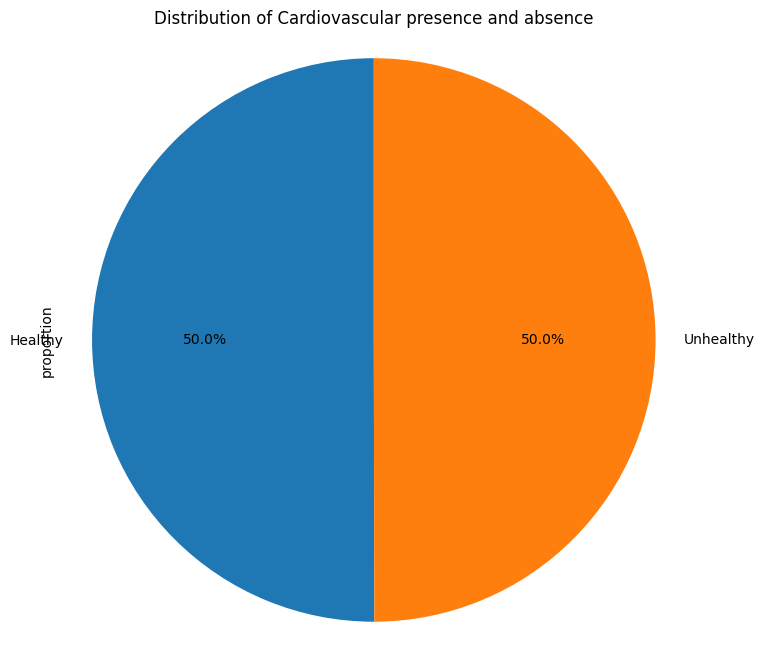

In [219]:
#Pie chart
df['cardio-pie'] = df['cardio'].map({0: 'Healthy', 1: 'Unhealthy'})
category_counts = df['cardio-pie'].value_counts(normalize=True)*100
category_counts.plot.pie(autopct='%1.1f%%',figsize=(8,8), startangle=90)
plt.title('Distribution of Cardiovascular presence and absence')
plt.axis('equal') 
plt.show()

In [220]:
df.to_csv("DataFrame.csv")